In [1]:
import numpy as np
import os
from astropy.io import fits as pyfits
import shutil
import math
from matplotlib import pyplot as plt
import statistics

In [2]:
def get_sorted_list(path_of_output_file,num_comp,comp,target_param): #graphs any two components of an object with each other
    output_file = open(path_of_output_file, "r")
    if(os.path.isfile(path_of_output_file) == False):
        return "FILE NOT FOUND"
    i_next = comp + 1
    param1_ar = []
    param2_ar = []
    i = -1
    lines = output_file.readlines()
    val_list = []
    for line in lines:
        comp_list = line.split()
        i += 1
        if(comp_list == []):
            continue
        if(comp_list[0] == "ERRORS"):
            break
        else:
            if(i == i_next):
                i_next = i_next + num_comp + 1
                val_param = comp_list[target_param]
                val_list.append(float(val_param))
            else:
                continue
    val_list.sort()
    return sorted(val_list)

In [3]:
def get_vals(sorted_list):
    #first getting mode
    in_list = False
    freq_list = []
    for i in range(len(sorted_list)):
        val = sorted_list[i]
        for j in range(len(freq_list)):
            if(freq_list[j][0] == val):
                freq_list[j][1] += 1
                in_list = True
                break
        if(in_list == True):
            in_list = False
            continue
        else:
            in_list = False
            freq_list.append([val,1])
    max_seen = 0
    for i in range(len(freq_list)):
        val = freq_list[i][1]
        if(val > max_seen):
            max_seen = val
    mode_list = []
    for i in range(len(freq_list)):
        val = freq_list[i][0]
        num = freq_list[i][1]
        if(num == max_seen):
            mode_list.append(val)
    #now getting the rest
    length = len(sorted_list)
    i_sixteen = int(0.16 * length)
    i_eightyfour = int(0.84*length)
    lower_quart = sorted_list[i_sixteen]
    upper_quart = sorted_list[i_eightyfour]
    mode = mode_list[0]
    median = statistics.median(sorted_list)
    return (median,mode,lower_quart,upper_quart)

In [4]:
def phihistogram(psi,path_of_output_file,num_comp,comp,binsize,galaxyname,paramname): #graphs any two components of an object with each other
    output_file = open(path_of_output_file, "r")
    if(os.path.isfile(path_of_output_file) == False):
        return "FILE NOT FOUND"
    i_next = comp + 1
    param_ar = []
    i = -1
    lines = output_file.readlines()
    for line in lines:
        comp_list = line.split()
        i += 1
        if(comp_list == []):
            continue
        if(comp_list[0] == "ERRORS"):
            break
        else:
            if(i == i_next):
                i_next = i_next + num_comp + 1
                pa = float(comp_list[6])
                theta = abs(psi - pa)
                phi = 90 - abs(theta - 90)
                param_ar.append(float(phi))
            else:
                continue
    plt.title(galaxyname)
    plt.ylabel("Frequency")
    plt.xlabel(paramname)
    plt.hist(param_ar,binsize)

In [5]:
def pahistogram(path_of_output_file,num_comp,comp,binsize,galaxyname,paramname): #graphs any two components of an object with each other
    output_file = open(path_of_output_file, "r")
    if(os.path.isfile(path_of_output_file) == False):
        return "FILE NOT FOUND"
    i_next = comp + 1
    param_ar = []
    i = -1
    lines = output_file.readlines()
    for line in lines:
        comp_list = line.split()
        i += 1
        if(comp_list == []):
            continue
        if(comp_list[0] == "ERRORS"):
            break
        else:
            if(i == i_next):
                i_next = i_next + num_comp + 1
                pa = float(comp_list[6])
                param_ar.append(float(pa))
            else:
                continue
    plt.title(galaxyname)
    plt.ylabel("Frequency")
    plt.xlabel(paramname)
    plt.hist(param_ar,binsize)

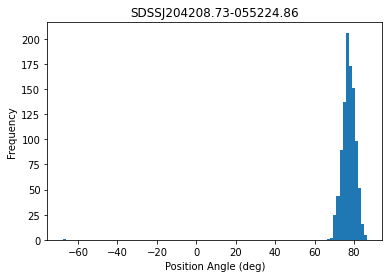

In [7]:
psi = float(-76.1224711697331)
pahistogram("/Users/rohanvenkat/Desktop/output_file.txt",1,0,100,"SDSSJ204208.73-055224.86","Position Angle (deg)")

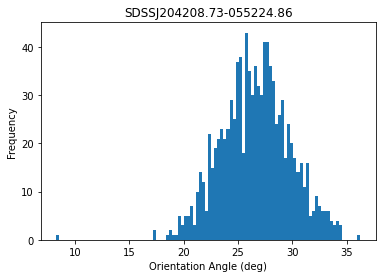

In [8]:
phihistogram(psi,"/Users/rohanvenkat/Desktop/output_file.txt",1,0,100,"SDSSJ204208.73-055224.86","Orientation Angle (deg)")

1.1299999999999955


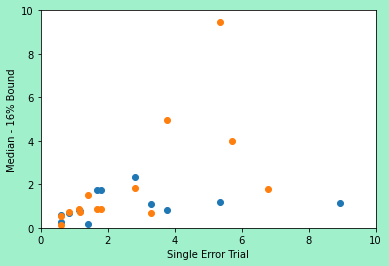

In [166]:
#Get dispersion (16 and 84 percent values) of each of the 17 distributions 
#and compare with the error given by galfit single trial run 
#(there will be two graphs: median-16% vs error single trial and 
#84% - median vs single trial run)

#Plot dispersion in best fit angle vs single trial error from galfit 
#(17 data point scatter plot)

#Plot the difference in y and x axis vs the distance (d)


path = "/Users/rohanvenkat/Desktop/output_files"
filelist = os.listdir(path)
val_list = []
for i in range(1,len(filelist)):
    sortedlist = ""
    filename = filelist[i]
    #print(filename)
    if(filename == "output_file_SDSSJ113328.09+032717.56.txt"): #these if statement galaxies have 2 components
        sortedlist = get_sorted_list(os.path.join(path,filename),2,0,6)
    #    print(len(sortedlist))
    elif(filename == "output_file_SDSSJ121640.34+071224.42.txt"):
        sortedlist = get_sorted_list(os.path.join(path,filename),2,0,6)
    #    print(len(sortedlist))
    elif(filename == "output_file_SDSSJ152424.70+095833.66.txt"):
        sortedlist = get_sorted_list(os.path.join(path,filename),2,0,6)
   #     print(len(sortedlist))
    else:
        sortedlist = get_sorted_list(os.path.join(path,filename),1,0,6)    
    tup = get_vals(sortedlist) #the order is: median, mode, 16%, 84%
    val_list.append(tup)
#now, plotting the first plot
med16_list = []
med84_list = []
best_fit_list = []
for i in range(len(val_list)):
    med16 = val_list[i][1] - val_list[i][2]
    med84 = val_list[i][3] - val_list[i][1]
    med16_list.append(med16)
    best_fit_list.append(val_list[i][1])
    if(i == 1):
        print(val_list[i][1] - val_list[i][2])
      #  print(val_list[i][1])
    med84_list.append(med84)
single_error_list = [0.610,8.940,7.400,6.780,1.170,1.410,0.610,1.670,3.300,3.780,1.790,5.360,5.700,0.850,1.130,2.810]
fig, ax = plt.subplots(facecolor ='#A0F0CC')
ax.set_xlim(0,10)
ax.set_ylim(0,10)

plt.xlabel('Single Error Trial')
plt.ylabel('Median - 16% Bound')
plt.scatter(single_error_list,med16_list)
plt.scatter(single_error_list,med84_list)

Text(0, 0.5, 'Median PA')

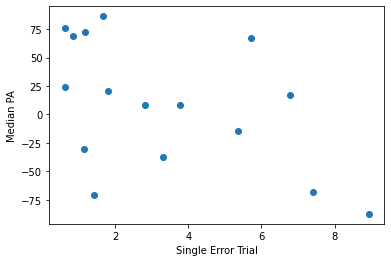

In [160]:
plt.scatter(single_error_list, best_fit_list)
plt.xlabel('Single Error Trial')
plt.ylabel('Median PA')